In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn import decomposition

%matplotlib inline

In [5]:
df = pd.read_csv(r"C:\Users\kevda\Desktop\ex_github\Data-Science-for-Marketing-Analytics\Data set 03\three_col.csv")
df.head()

,income,age,days_since_purchase
0,56432,31,492
1,137580,38,551
2,68285,59,304
3,93617,51,507
4,113441,54,509


In [6]:
colomns = df.columns
zcolomns = []

for col in colomns:
    df['z_' + col] = (df[col]-df[col].mean())/df[col].std()
    zcolomns.append('z_' + col)

In [7]:
zcolomns

['z_income', 'z_age', 'z_days_since_purchase']

In [8]:
df.head()

,income,age,days_since_purchase,z_income,z_age,z_days_since_purchase
0,56432,31,492,-0.606833,-0.748848,0.818321
1,137580,38,551,1.505879,-0.135469,1.349109
2,68285,59,304,-0.298237,1.704668,-0.873001
3,93617,51,507,0.361289,1.003663,0.953267
4,113441,54,509,0.877413,1.266540,0.971260


In [9]:
model = cluster.KMeans(n_clusters=4, random_state=10)
df['cluster'] = model.fit_predict(df[zcolomns])

In [10]:
pca = decomposition.PCA(n_components=2)
df['pca1'],df['pca2'] = zip(*pca.fit_transform(df[zcolomns]))

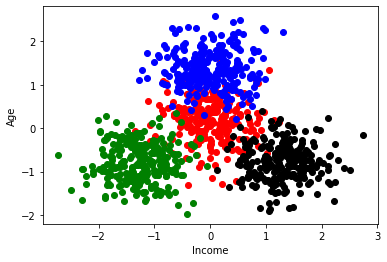

In [11]:
color= ['r','b','k','g']

for c in df['cluster'].unique():
    d = df[df['cluster']==c]
    plt.scatter(d['pca1'],d['pca2'], color=color[c])

plt.xlabel('Income')
plt.ylabel('Age')   
plt.show()

In [12]:
for cluster in df['cluster'].unique():
    print('cluster: '+ str(cluster))
    for col in colomns:
        print(col + ":{:2f}".format(df.loc[df['cluster']==cluster,col].mean()))

cluster: 0
income:46153.196787
age:29.341365
days_since_purchase:498.188755
cluster: 3
income:113118.222222
age:49.769841
days_since_purchase:502.583333
cluster: 2
income:45002.099602
age:49.490040
days_since_purchase:299.661355
cluster: 1
income:114704.120968
age:29.338710
days_since_purchase:302.919355
